In [10]:
import numpy as np
import mne
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors

In [11]:
# 분석대상 이름 입력
name = input("분석대상 이름을 입력하세요.")
print(f"분석대상 이름은 {name}입니다.")

# Loading saved TFR file
file_path = rf'D:\Mg_EEG\tfr_files\{name}_7200_tfr.h5'
tfr = mne.time_frequency.read_tfrs(file_path)
print(f"성공적으로 tfr 파일을 로딩하였습니다.")

# Saving raw file for back-up
tfr_raw = tfr.copy()
print(f"tfr_raw에 tfr을 복사하였습니다.")

분석대상 이름은 정광훈2입니다.
Reading D:\Mg_EEG\tfr_files\정광훈2_7200_tfr.h5 ...
성공적으로 tfr 파일을 로딩하였습니다.
tfr_raw에 tfr을 복사하였습니다.


In [ ]:
# Remove 'gamma' from the name variable
name = name.replace('2mo', '')
print(name)

In [ ]:
#데이터가 뭔가 이상할 때 리셋하는 복구 코드
#tfr = tfr_raw

In [12]:
# 플로팅할 데이터셋 생성
tfr_mean = np.mean(tfr.data, axis=0)
tfr_mean_mean = np.mean(tfr_mean, axis=0)
tfr_mean_raw = tfr_mean.copy()
tfr_mean_mean_raw = tfr_mean_mean.copy()

# 안 지운 time-power plot 저장

In [ ]:
# tfr.times에 대한 tfr_mean_mean의 플롯 생성
plt.figure(figsize=(15, 6))
plt.plot(tfr.times, tfr_mean_mean_raw, label='TFR Mean')

# bad_idx에 해당하는 구간을 반투명으로 표시
#for idx in bad_idx:
#    plt.axvspan(tfr.times[idx], tfr.times[idx+1], color='red', alpha=0.3)

# 레이블 및 제목 추가
plt.xlabel('Time (s)')
plt.ylabel('Mean Power')
plt.title('TFR Mean with Bad Indices Highlighted')
plt.legend()

# 플롯 표시
plt.tight_layout()
plt.show()

Bad_idx 수정하기

In [14]:
# large artifact data load
csv_file_path = r'C:\Users\Brain_Science\Documents\GitHub\Mg_infusion_coma\large_artifact.csv'

large_artifact_data = pd.read_csv(csv_file_path, encoding='utf-8-sig')

# 입력한 이름이 데이터프레임에 존재하는지 확인하고 좌표 가져오기
if name in large_artifact_data['Name'].values:
    # 입력한 이름에 해당하는 데이터 가져오기
    coordinates = large_artifact_data[large_artifact_data['Name'] == name]['Coordinates'].values[0]
    
    # 좌표가 'skip'이면 빈 리스트로 설정
    if coordinates == 'skip':
        large_artifact = []
    else:
        # 좌표 문자열을 리스트로 변환
        import ast
        large_artifact = ast.literal_eval(coordinates)
else:
    print(f"{input_name}이(가) 데이터에 없습니다.")
    large_artifact = []

# 결과 출력
print("large_artifact 리스트:")
print(large_artifact)

large_artifact 리스트:
[(9, 25), (194, 210), (338, 350), (547, 548), (670, 718), (762, 769), (776, 777), (841, 856), (884, 960), (1168, 1176), (1974, 1983), (2223, 2254), (2388, 2392), (2501, 2767), (3470, 3476), (3846, 3852), (4350, 4355), (4545, 4556), (4614, 4640), (4698, 4717), (4750, 4754), (4864, 4925), (5080, 5182), (5235, 5275), (5326, 5342), (5365, 5375), (5436, 5442), (5466, 5472), (5954, 5964), (5980, 6000), (6781, 6940), (7096, 7111), (7150, 7176), (7194, 7199)]


# Time-Power plot

NameError: name 'bad_idx' is not defined

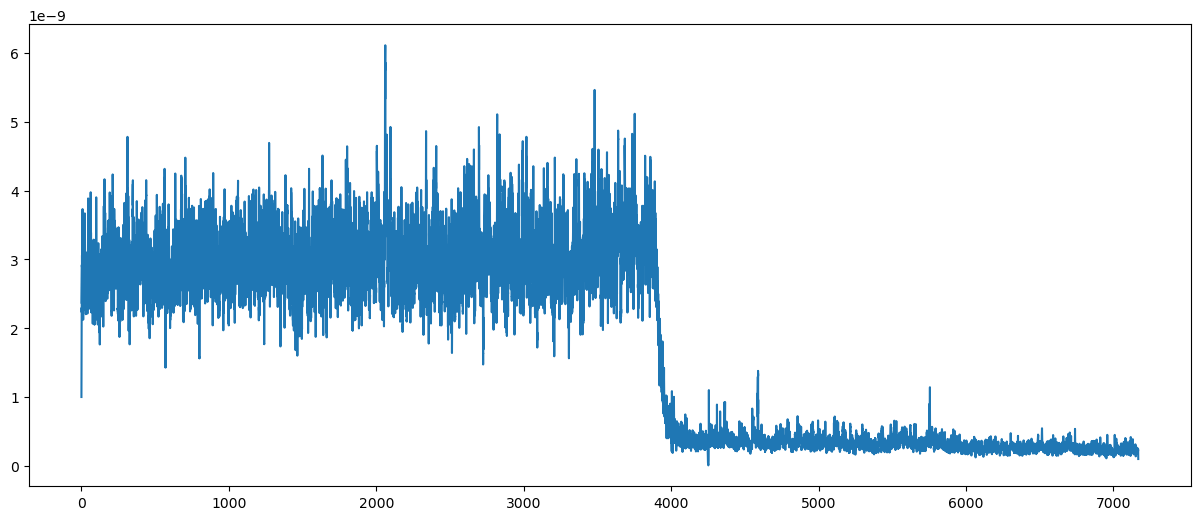

In [5]:
%matplotlib inline
# tfr.times에 대한 tfr_mean_mean의 플롯 생성
plt.figure(figsize=(15, 6))
plt.plot(tfr.times, tfr_mean_mean, label='TFR Mean')

# bad_idx에 해당하는 구간을 반투명으로 표시
for idx in bad_idx:
    plt.axvspan(tfr.times[idx], tfr.times[idx+1], color='red', alpha=0.3)

# 레이블 및 제목 추가
plt.xlabel('Time (s)')
plt.ylabel('Mean Power')
plt.title('TFR Mean with Bad Indices Highlighted')
plt.legend()

# 플롯 표시
plt.tight_layout()
plt.show()

In [ ]:
# 특정 영역 확대
start_idx = np.searchsorted(tfr.times, 6000)
end_idx = np.searchsorted(tfr.times, 7200)

# tfr.times에 대한 tfr_mean_mean의 플롯 생성
plt.figure(figsize=(15, 6))
plt.plot(tfr.times[start_idx:end_idx], tfr_mean_mean[start_idx:end_idx], label='TFR Mean')

# bad_idx에 해당하는 구간을 반투명으로 표시
for idx in bad_idx:
    if start_idx <= idx < end_idx:
        plt.axvspan(tfr.times[idx], tfr.times[idx+1], color='red', alpha=0.3)

# 레이블 및 제목 추가
plt.xlabel('Time (s)')
plt.ylabel('Mean Power')
plt.title('TFR Mean from 100s to 200s with Bad Indices Highlighted')
plt.legend(loc='upper left')

# 플롯 표시
plt.tight_layout()
plt.show()

# CDSA 플로팅

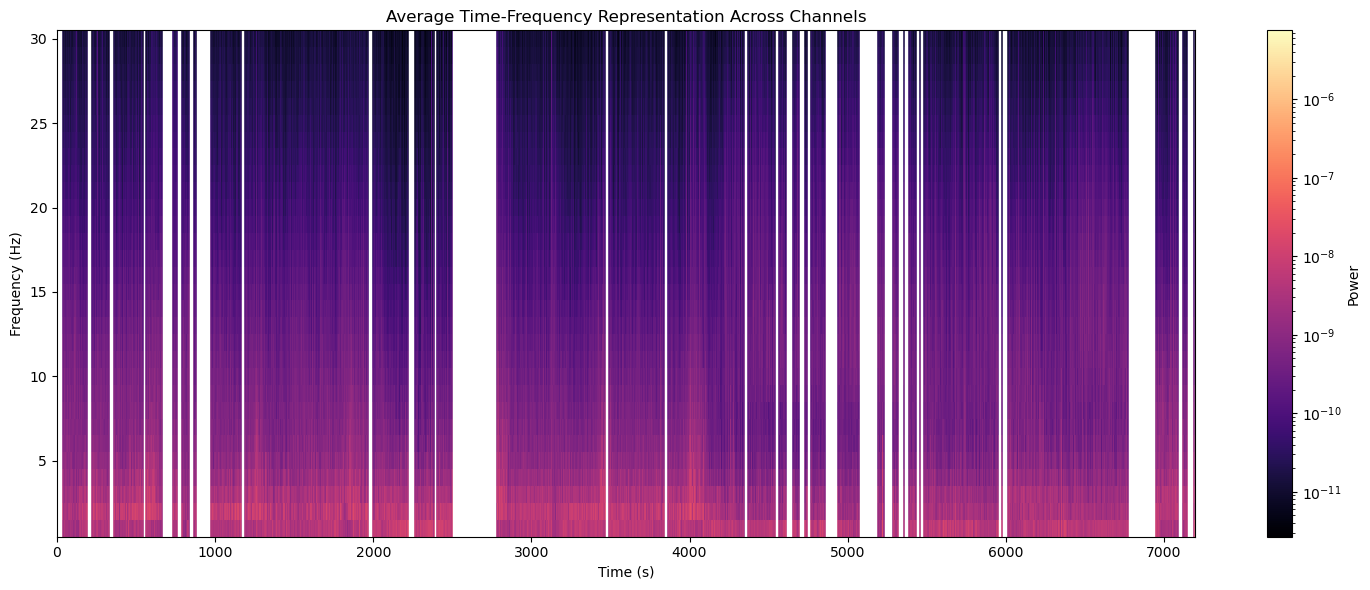

In [15]:
# 로그 스케일 기본 plot

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
import matplotlib.colors as colors

im = ax.pcolormesh(tfr.times, tfr.freqs, tfr_mean, 
                   norm=colors.LogNorm(vmin=tfr_mean.min(), vmax=tfr_mean.max()),
                   cmap='magma', shading='auto')
# artifact 구간 표시
for start, end in large_artifact:
    ax.axvspan(start, end, color='white', alpha=1.0)

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power')

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
tfr_mean.shape

(30, 1433601)

In [ ]:
#  일반 스케일 기본 plot

# Create the plot
fig, ax = plt.subplots(figsize=(15, 6))

# Use pcolormesh to create the time-frequency plot
import matplotlib.colors as colors

im = ax.pcolormesh(tfr.times, tfr.freqs, tfr_mean, 
                   vmin=tfr_mean.min(), vmax=tfr_mean.max(),
                   cmap='jet', shading='auto')
# artifact 구간 표시
for start, end in large_artifact:
    ax.axvspan(start, end, color='white', alpha=1.0)

# Add labels and title
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Power')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# 밴드별 plot

# Create figure with subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(15, 4))

# 델타파 플롯 (각각의 데이터 범위에 맞는 vmin, vmax 사용)
delta_data = tfr_mean[0:4]
im1 = ax1.pcolormesh(tfr.times, [1, 2, 3, 4], delta_data,
                     vmin=delta_data.min(), vmax=delta_data.max(),
                     cmap='jet', shading='auto')
for start, end in large_artifact:
    ax1.axvspan(start, end, color='white', alpha=1.0)
ax1.set_ylabel('Delta (Hz)')
ax1.set_title('Time-Frequency Representation Across Channels')
fig.colorbar(im1, ax=ax1).set_label('Power')

# 세타파 플롯
theta_data = tfr_mean[4:9]
im2 = ax2.pcolormesh(tfr.times, [4, 5, 6, 7, 8], theta_data,
                     vmin=theta_data.min(), vmax=theta_data.max(),
                     cmap='jet', shading='auto')
for start, end in large_artifact:
    ax2.axvspan(start, end, color='white', alpha=1.0)
ax2.set_ylabel('Theta (Hz)')
fig.colorbar(im2, ax=ax2).set_label('Power')

# 알파파 플롯
alpha_data = tfr_mean[9:14]
im3 = ax3.pcolormesh(tfr.times, [8, 9, 10, 11, 12], alpha_data,
                     vmin=alpha_data.min(), vmax=alpha_data.max(),
                     cmap='jet', shading='auto')
for start, end in large_artifact:
    ax3.axvspan(start, end, color='white', alpha=1.0)
ax3.set_ylabel('Alpha (Hz)')
fig.colorbar(im3, ax=ax3).set_label('Power')

# 베타파 플롯
beta_data = tfr_mean[14:19]
im4 = ax4.pcolormesh(tfr.times, [12, 13, 14, 15, 16], beta_data,
                     vmin=beta_data.min(), vmax=beta_data.max(),
                     cmap='jet', shading='auto')
for start, end in large_artifact:
    ax4.axvspan(start, end, color='white', alpha=1.0)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Beta (Hz)')
fig.colorbar(im4, ax=ax4).set_label('Power')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# CDSA + 다항회귀추세선

# Fit a polynomial of degree 3
coefficients = np.polyfit(tfr.times, tfr_mean_mean, 10)
polynomial = np.poly1d(coefficients)
trend = polynomial(tfr.times)

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(tfr.times, tfr_mean_mean, label='TFR Mean')
plt.plot(tfr.times, trend, label='Polynomial Trend', color='red')

# Add labels and title
plt.xlabel('Time (s)')
plt.ylabel('Mean Power')
plt.title('TFR Mean with Polynomial Trend Line')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# CDSA + time-power plot

# tfr_mean_mean 계산
tfr_mean_mean = np.mean(tfr_mean, axis=0)

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 4))

# Use pcolormesh to create the time-frequency plot
im = ax1.pcolormesh(tfr.times, tfr.freqs, tfr_mean, 
                    norm=colors.LogNorm(vmin=tfr_mean.min(), vmax=tfr_mean.max()),
                    cmap='jet', shading='auto')

# artifact 구간 표시
for start, end in large_artifact:
    ax1.axvspan(start, end, color='white', alpha=1.0)

# Add labels and title for the first plot
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_title('Average Time-Frequency Representation Across Channels')

# Add a colorbar for the first plot
cbar = fig.colorbar(im, ax=ax1)
cbar.set_label('Power')

# Create a second y-axis for the second plot
ax2 = ax1.twinx()

# tfr.times에 대한 time-power plot 생성
ax2.plot(tfr.times, tfr_mean_mean, label='TFR Mean', color='black')

# bad_idx에 해당하는 구간을 반투명으로 표시
for idx in bad_idx:
    ax2.axvspan(tfr.times[idx], tfr.times[idx+1], color='white', alpha=1.0)

# Add labels and title for the second plot
ax2.set_ylabel('Mean Power')

# Add a legend for the second plot
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# CDSA + 이동평균 plot

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# tfr_mean_mean 계산
tfr_mean_mean = np.mean(tfr_mean, axis=0)

# 이동평균 계산 (윈도우 크기 설정)
window_size = 200*60 # window size 1 minute
tfr_mean_mean_smooth = pd.Series(tfr_mean_mean).rolling(window=window_size, center=True).mean()

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 3))

# Use pcolormesh to create the time-frequency plot
im = ax1.pcolormesh(tfr.times, tfr.freqs, tfr_mean, 
                    norm=colors.LogNorm(vmin=tfr_mean.min(), vmax=tfr_mean.max()),
                    cmap='magma', shading='auto')

# artifact 구간 표시
for start, end in large_artifact:
    ax1.axvspan(start, end, color='white', alpha=1.0)

# Add labels and title for the first plot
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency (Hz)')

# Add a colorbar for the first plot
cbar = fig.colorbar(im, ax=ax1)
cbar.set_label('Power (dB)')

# Create a second y-axis for the second plot
ax2 = ax1.twinx()

# tfr.times에 대한 tfr_mean_mean의 이동평균 추세선 플롯 생성
ax2.plot(tfr.times, tfr_mean_mean_smooth, label='TFR Mean (Moving Average)', color='yellow')

# Add labels and title for the second plot
ax2.set_ylabel('Mean Power ($\mu V^2$)')

# Add a legend for the second plot
ax2.legend(loc='upper right')

# Draw a red line at 3600 seconds
ax2.axvline(x=3600, color='cyan', linestyle='--', linewidth=2, label='Mg infusion')

# Display the plot
plt.tight_layout()
plt.show()